In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from joblib import Parallel, delayed
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, classification_report
import warnings
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

2025-06-14 16:36:09.517648: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-14 16:36:09.597234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-14 16:36:09.597288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-14 16:36:09.601165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-14 16:36:09.622898: I tensorflow/core/platform/cpu_feature_guar

In [3]:
general_path = '../Data'
df_appearances = pd.read_csv(general_path + '/appearances.csv')
df_clubs = pd.read_csv(general_path + '/clubs.csv')
df_competitions = pd.read_csv(general_path + '/competitions.csv')
df_game_events = pd.read_csv(general_path + '/game_events.csv')
df_game_lineups = pd.read_csv(general_path + '/game_lineups.csv')
df_games = pd.read_csv(general_path + '/games.csv')
df_player_valuations = pd.read_csv(general_path + '/player_valuations.csv')
df_players = pd.read_csv(general_path + '/players.csv')
df_transfers = pd.read_csv(general_path + '/transfers.csv')

In [4]:
for name in ['Lamine Yamal', 'Florian Wirtz', 'Jamal Musiala']:
    matches = df_players[df_players['name'].str.contains(name, case=False, na=False)]

In [5]:
df_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706800 entries, 0 to 1706799
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   appearance_id           object
 1   game_id                 int64 
 2   player_id               int64 
 3   player_club_id          int64 
 4   player_current_club_id  int64 
 5   date                    object
 6   player_name             object
 7   competition_id          object
 8   yellow_cards            int64 
 9   red_cards               int64 
 10  goals                   int64 
 11  assists                 int64 
 12  minutes_played          int64 
dtypes: int64(9), object(4)
memory usage: 169.3+ MB


In [6]:
df_clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   domestic_competition_id  439 non-null    object 
 1   club_id                  439 non-null    int64  
 2   club_code                439 non-null    object 
 3   name                     439 non-null    object 
 4   squad_size               439 non-null    int64  
 5   average_age              439 non-null    float64
 6   foreigners_number        439 non-null    int64  
 7   foreigners_percentage    439 non-null    float64
 8   national_team_players    439 non-null    int64  
 9   stadium_name             439 non-null    object 
 10  stadium_seats            439 non-null    int64  
 11  net_transfer_record      439 non-null    object 
 12  last_season              439 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 44.7+ KB


In [7]:
df_competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   competition_id            44 non-null     object
 1   competition_code          44 non-null     object
 2   name                      44 non-null     object
 3   sub_type                  44 non-null     object
 4   type                      44 non-null     object
 5   country_id                44 non-null     int64 
 6   country_name              44 non-null     object
 7   domestic_league_code      44 non-null     object
 8   confederation             44 non-null     object
 9   is_major_national_league  44 non-null     bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 3.3+ KB


In [8]:
df_game_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035043 entries, 0 to 1035042
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   game_event_id     1035043 non-null  object 
 1   date              1035043 non-null  object 
 2   game_id           1035043 non-null  int64  
 3   minute            1035043 non-null  int64  
 4   type              1035043 non-null  object 
 5   club_id           1035043 non-null  int64  
 6   player_id         1035043 non-null  int64  
 7   player_in_id      497678 non-null   float64
 8   player_assist_id  156759 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 71.1+ MB


In [9]:
df_game_lineups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191911 entries, 0 to 2191910
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   date             object
 2   game_id          int64 
 3   player_id        int64 
 4   club_id          int64 
 5   player_name      object
 6   type             object
 7   position         object
 8   number           int64 
 9   team_captain     int64 
dtypes: int64(5), object(5)
memory usage: 167.2+ MB


In [10]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78488 entries, 0 to 78487
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   game_id                 78488 non-null  int64 
 1   competition_id          78488 non-null  object
 2   season                  78488 non-null  int64 
 3   round                   78488 non-null  object
 4   date                    78488 non-null  object
 5   home_club_id            78488 non-null  int64 
 6   away_club_id            78488 non-null  int64 
 7   home_club_goals         78488 non-null  int64 
 8   away_club_goals         78488 non-null  int64 
 9   home_club_position      78488 non-null  object
 10  away_club_position      78488 non-null  object
 11  home_club_manager_name  78488 non-null  object
 12  away_club_manager_name  78488 non-null  object
 13  stadium                 78488 non-null  object
 14  attendance              78488 non-null  int64 
 15  re

In [11]:
df_player_valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            496606 non-null  int64 
 1   date                                 496606 non-null  object
 2   market_value_in_eur                  496606 non-null  int64 
 3   current_club_id                      496606 non-null  int64 
 4   player_club_domestic_competition_id  496606 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.9+ MB


In [12]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_of_birth                         32601 non-null  object 
 1   player_id                             32601 non-null  int64  
 2   first_name                            32601 non-null  object 
 3   last_name                             32601 non-null  object 
 4   name                                  32601 non-null  object 
 5   last_season                           32601 non-null  int64  
 6   current_club_id                       32601 non-null  int64  
 7   player_code                           32601 non-null  object 
 8   country_of_birth                      32601 non-null  object 
 9   date_of_birth                         32601 non-null  object 
 10  sub_position                          32601 non-null  object 
 11  position       

In [13]:
df_transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79646 entries, 0 to 79645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            79646 non-null  int64  
 1   transfer_date        79646 non-null  object 
 2   transfer_season      79646 non-null  object 
 3   from_club_id         79646 non-null  int64  
 4   to_club_id           79646 non-null  int64  
 5   from_club_name       79646 non-null  object 
 6   to_club_name         79646 non-null  object 
 7   transfer_fee         79646 non-null  float64
 8   market_value_in_eur  79646 non-null  float64
 9   player_name          79646 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.1+ MB


## Primer Modelo


In [14]:
df_players['market_value_in_eur'].head()

0     75000.0
1     75000.0
2    200000.0
3    100000.0
4    300000.0
Name: market_value_in_eur, dtype: float64

In [15]:

current_date = pd.to_datetime('2025-06-12 13:39:00').tz_localize(None)  # Current time
# Convierte a datetime (con errores a NaT)
df_players['date_of_birth'] = pd.to_datetime(
    df_players['date_of_birth'], errors='coerce'
)

# Solo si la columna es de tipo datetime usamos .dt
if pd.api.types.is_datetime64_any_dtype(df_players['date_of_birth']):
    # Si tiene zona horaria, quitársela
    if df_players['date_of_birth'].dt.tz is not None:
        df_players['date_of_birth'] = df_players['date_of_birth'].dt.tz_localize(None)
    
    # Calcular la edad de forma robusta
    df_players['age'] = (
        (current_date - df_players['date_of_birth'])
        .astype('timedelta64[D]') / 365.25
    )
else:
    raise ValueError("La columna 'date_of_birth' no se pudo convertir a datetime.")


ValueError: La columna 'date_of_birth' no se pudo convertir a datetime.

In [ ]:
# Function to prepare data
def prepare_data(df_players, df_appearances, df_player_valuations, df_transfers=None, max_age=22, min_matches=30):
    """
    Prepares data for training, filtering players by age ≤ max_age and matches ≥ min_matches, with detailed debugging.

    Parameters:
    - df_players: DataFrame with player information
    - df_appearances: DataFrame with player performance
    - df_player_valuations: DataFrame with market valuations
    - df_transfers: DataFrame with transfer fees (optional)
    - max_age: Maximum age for players (default: 22)
    - min_matches: Minimum matches played (default: 30)

    Returns:
    - X: Feature matrix
    - y: Target variable
    - scaler: Fitted StandardScaler
    - df_final: DataFrame with player details
    """
    # Ensure timezone-naive datetime conversions
    current_date = pd.to_datetime('2025-06-12 13:39:00').tz_localize(None)  # Current time
    print(f"Processing data as of {current_date}")

    # Convert date_of_birth to datetime and remove timezone
    df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'], errors='coerce')

    if df_players['date_of_birth'].dt.tz is not None:
        df_players['date_of_birth'] = df_players['date_of_birth'].dt.tz_localize(None)

    df_players['age'] = (current_date - df_players['date_of_birth']).dt.days / 365.25

    # Debug: Check for specific players in df_players
    print("\nChecking for key players in df_players:")
    target_players = ['Lamine Yamal', 'Florian Wirtz', 'Jamal Musiala']
    for name in target_players:
        if 'name' in df_players.columns:
            matches = df_players[df_players['name'].str.contains(name, case=False, na=False)]
        else:
            matches = df_players[df_players['first_name'].str.contains(name.split()[0], case=False, na=False) |
                                 df_players['last_name'].str.contains(name.split()[-1], case=False, na=False)]
        if not matches.empty:
            print(f"{name} found: {matches[['player_id', 'first_name', 'last_name', 'age']].to_dict('records')}")
        else:
            print(f"{name} not found in df_players")

    # Filter players by age
    df_young = df_players[df_players['age'] <= max_age].copy()

    # Count matches per player
    matches_played = df_appearances.groupby('player_id')['game_id'].nunique().reset_index(name='matches_played')
    df_young = df_young.merge(matches_played, on='player_id', how='left')
    df_young['matches_played'] = df_young['matches_played'].fillna(0)

    # Debug: Check target players' match counts
    print("\nChecking target players' match counts:")
    for name in target_players:
        matches = df_young[df_young['name'].str.contains(name, case=False, na=False)]
        if not matches.empty:
            print(f"{name}: {matches[['player_id', 'name', 'age', 'matches_played']].to_dict('records')}")

    # Filter by minimum matches
    df_young = df_young[df_young['matches_played'] >= min_matches].copy()
    print(f"Number of players with age ≤ {max_age} and ≥ {min_matches} matches: {len(df_young)}")

    # Debug: Check target players after match filter
    print("\nChecking target players after match filter:")
    for name in target_players:
        matches = df_young[df_young['name'].str.contains(name, case=False, na=False)]
        if not matches.empty:
            print(f"{name}: {matches[['player_id', 'name', 'age', 'matches_played']].to_dict('records')}")

    # Aggregate performance metrics (focus on 2024–2025 season if available)
    recent_appearances = df_appearances[pd.to_datetime(df_appearances['date'], errors='coerce') >= '2024-01-01']
    if recent_appearances.empty:
        print("No appearances after 2024-01-01, using all appearances.")
        recent_appearances = df_appearances
    df_agg = recent_appearances.groupby('player_id').agg({
        'goals': 'mean',
        'assists': 'mean',
        'minutes_played': 'mean',
        'yellow_cards': 'mean',
        'red_cards': 'mean'
    }).reset_index()

    # Add transfer fee as a feature (if available)
    if df_transfers is not None:
        transfer_fees = df_transfers.groupby('player_id')['transfer_fee'].max().reset_index(name='max_transfer_fee')
        df_agg = df_agg.merge(transfer_fees, on='player_id', how='left')
        df_agg['max_transfer_fee'] = df_agg['max_transfer_fee'].fillna(0)

    # Merge with player data
    df_merged = df_young.merge(df_agg, on='player_id', how='left')

    # Convert valuation dates to timezone-naive
    df_player_valuations['date'] = pd.to_datetime(df_player_valuations['date'], errors='coerce')

    if df_player_valuations['date'].dt.tz is not None:
        df_player_valuations['date'] = (df_player_valuations['date'].dt.tz_localize(None))

    # Calculate target: market value in 3 years
    future_date = current_date + pd.Timedelta(days=3*365)
    df_future_vals = df_player_valuations[df_player_valuations['date'] <= future_date]
    if df_future_vals.empty:
        print("Warning: No future valuations found, using latest available.")
        df_future_vals = df_player_valuations.sort_values('date').groupby('player_id').last().reset_index()
    else:
        df_future_vals = df_future_vals.sort_values('date').groupby('player_id').last().reset_index()

    # Debug: Check target players' valuation data
    print("\nChecking target players' valuation data:")
    for name in target_players:
        player_ids = df_young[df_young['name'].str.contains(name, case=False, na=False)]['player_id']
        if not player_ids.empty:
            val_data = df_future_vals[df_future_vals['player_id'].isin(player_ids)]
            if not val_data.empty:
                print(f"{name} valuation: {val_data[['player_id', 'market_value_in_eur', 'date']].to_dict('records')}")
            else:
                print(f"{name} has no future valuation data")

    # Target: 1 if market value > mean, 0 otherwise
    mean_market_value = df_future_vals['market_value_in_eur'].mean()
    df_future_vals['target'] = (df_future_vals['market_value_in_eur'] > mean_market_value).astype(int)

    # Merge with features
    df_final = df_merged.merge(df_future_vals[['player_id', 'target']], on='player_id', how='inner')

    # Debug: Check target players in df_final
    print("\nChecking target players in df_final:")
    for name in target_players:
        matches = df_final[df_final['name'].str.contains(name, case=False, na=False)]
        if not matches.empty:
            print(f"{name}: {matches[['player_id', 'name', 'age', 'matches_played', 'target']].to_dict('records')}")

    # Create name column if missing
    if 'name' not in df_final.columns:
        df_final['name'] = df_final['first_name'] + ' ' + df_final['last_name']

    # Select features
    features = ['age', 'goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards']
    if 'max_transfer_fee' in df_final.columns:
        features.append('max_transfer_fee')
    X = df_final[features].fillna(0)

    # Encode categorical variables (e.g., position)
    le = LabelEncoder()
    df_final['position_encoded'] = le.fit_transform(df_final['position'])
    X['position_encoded'] = df_final['position_encoded']

    y = df_final['target']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, df_final
# Prepare data
X, y, scaler, df_final = prepare_data(df_players, df_appearances, df_player_valuations, df_transfers, max_age=22, min_matches=30)

Processing data as of 2025-06-12 13:39:00

Checking for key players in df_players:
Lamine Yamal found: [{'player_id': 937958, 'first_name': 'desconocido', 'last_name': 'Lamine Yamal', 'age': nan}]
Florian Wirtz found: [{'player_id': 598577, 'first_name': 'Florian', 'last_name': 'Wirtz', 'age': nan}]
Jamal Musiala found: [{'player_id': 580195, 'first_name': 'Jamal', 'last_name': 'Musiala', 'age': 22.29158110882957}]

Checking target players' match counts:
Number of players with age ≤ 22 and ≥ 30 matches: 138

Checking target players after match filter:

Checking target players' valuation data:

Checking target players in df_final:


In [ ]:
df_final['market_value_in_eur']

0      10000000.0
1       8000000.0
2       2000000.0
3       6000000.0
4        800000.0
          ...    
133    35000000.0
134    35000000.0
135    20000000.0
136    10000000.0
137    40000000.0
Name: market_value_in_eur, Length: 138, dtype: float64

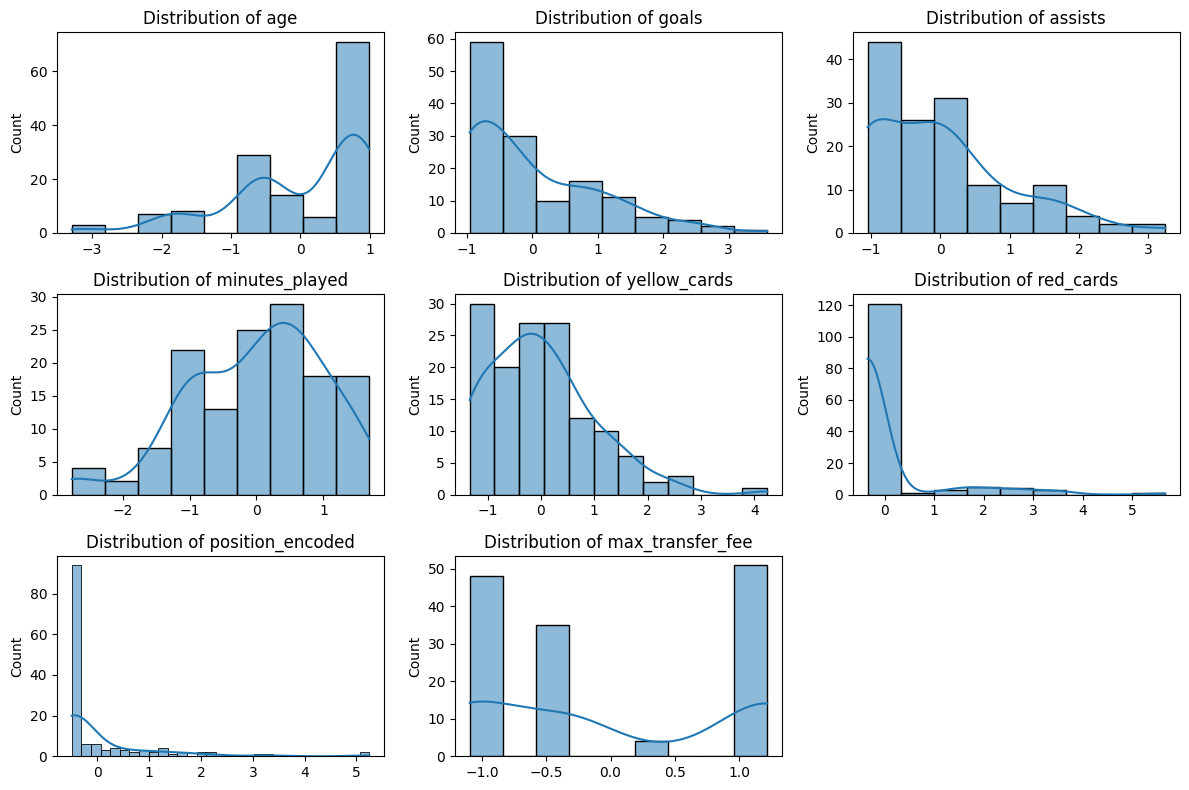

In [ ]:
# Plot distributions
feature_names = ['age', 'goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards', 'position_encoded']
if 'max_transfer_fee' in df_final.columns:
    feature_names.append('max_transfer_fee')
plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_names, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[:, i-1], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

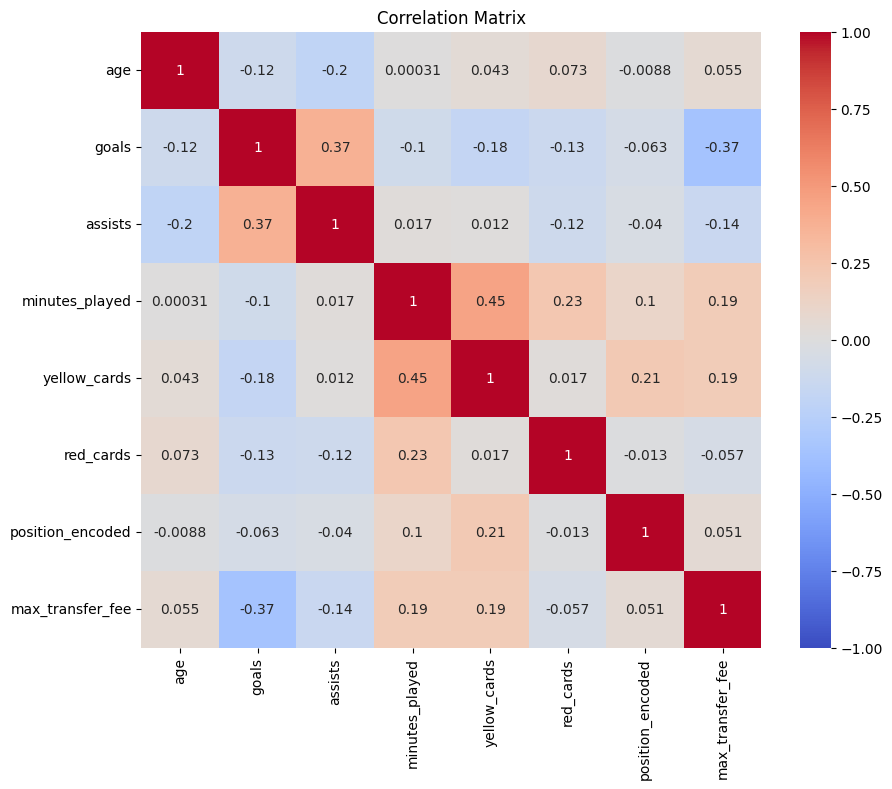

In [ ]:
# Correlation matrix
corr_matrix = pd.DataFrame(X, columns=feature_names).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


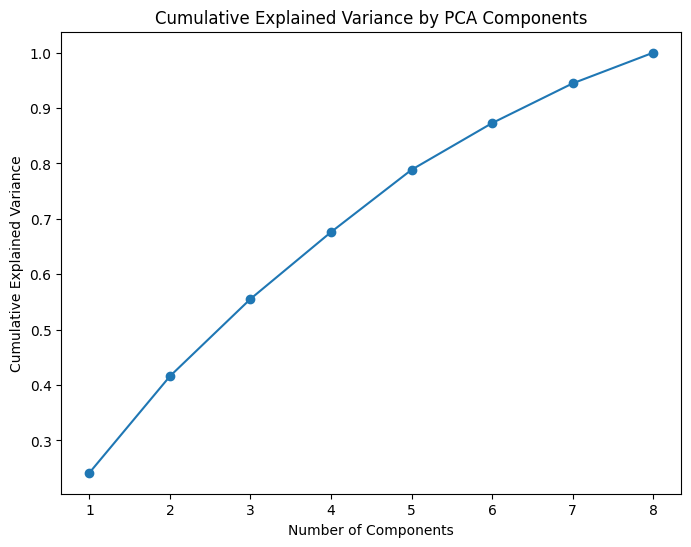

In [ ]:
# PCA analysis
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
# Markdown: Data Balancing
"""
### Data Balancing
We check the balance of the target variable and apply SMOTE if necessary.
"""

# Check class balance
print("Class distribution:\n", pd.Series(y).value_counts(normalize=True))
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("Balanced class distribution:\n", pd.Series(y_balanced).value_counts(normalize=True))

Class distribution:
 target
1    0.710145
0    0.289855
Name: proportion, dtype: float64
Balanced class distribution:
 target
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Target players with ≥30 matches included in test set: 0

Random Forest Metrics: {'Accuracy': 0.75, 'Precision': 0.7391304347826086, 'Recall': 0.9444444444444444, 'F1-Score': 0.8292682926829268, 'ROC-AUC': 0.788888888888889}


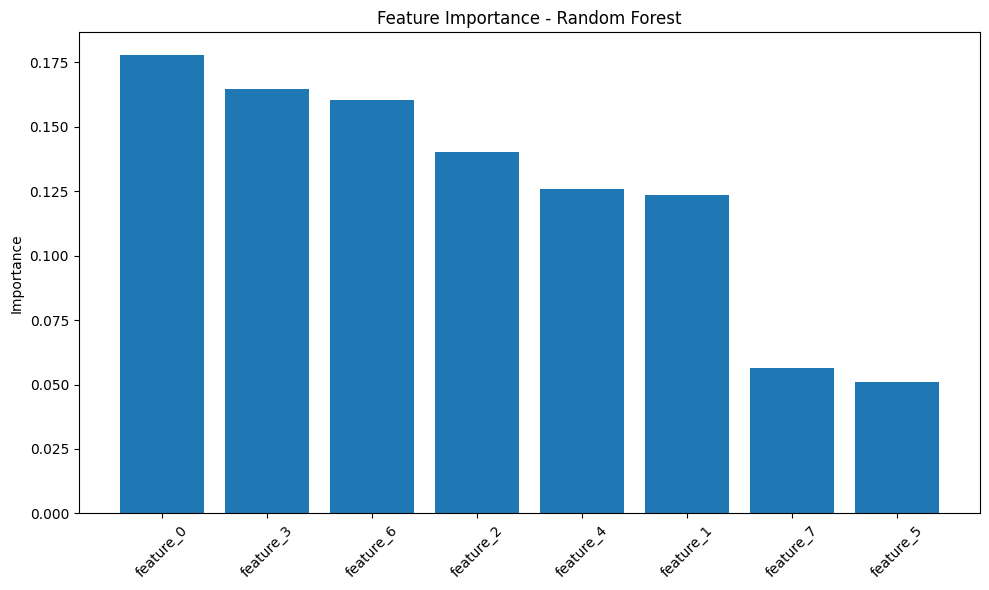

2025-06-14 16:34:36.446266: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: JIT compilation failed.


UnknownError: Exception encountered when calling layer 'batch_normalization_28' (type BatchNormalization).

{{function_node __wrapped__Rsqrt_device_/job:localhost/replica:0/task:0/device:GPU:0}} JIT compilation failed. [Op:Rsqrt] name: 

Call arguments received by layer 'batch_normalization_28' (type BatchNormalization):
  • inputs=tf.Tensor(shape=(32, 128), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Custom train-test split to include target players
target_players = ['Lamine Yamal', 'Florian Wirtz', 'Jamal Musiala']
target_ids = df_final[df_final['name'].str.contains('|'.join(target_players), case=False, na=False)]['player_id']
target_mask = df_final['player_id'].isin(target_ids)
target_indices = df_final[target_mask].index
non_target_indices = df_final[~target_mask].index

# Ensure 'market_value_in_eur' is included in features
# Example: X = df_final[['goals', 'assists', 'market_value_in_eur']].to_numpy()
# Verify that X includes all intended features

# Split non-target data
X_non_target = X[non_target_indices]
y_non_target = y[non_target_indices]
X_train, X_test_non_target, y_train, y_test_non_target = train_test_split(
    X_non_target, y_non_target, test_size=0.2, random_state=42
)

y_train = y_train.to_numpy()
y_test_non_target = y_test_non_target.to_numpy()

# Include target players in test set if they meet min_matches
if not target_indices.empty:
    X_test_target = X[target_indices]
    y_test_target = y[target_indices]

    y_test_target = y_test_target.to_numpy()
    y_test = np.concatenate([y_test_non_target, y_test_target])

    # Extract market values and names for target players
    target_info = df_final.loc[target_indices, ['name', 'market_value_in_eur']]
    X_test = np.vstack([X_test_non_target, X_test_target])
    y_test = pd.concat([y_test_non_target, y_test_target])
else:
    X_test = X_test_non_target
    y_test = y_test_non_target
    target_info = pd.DataFrame()  # Empty DataFrame if no targets
    print("Warning: No target players with ≥30 matches found in df_final to include in test set.")

print(f"Target players with ≥30 matches included in test set: {len(target_indices)}")
if not target_info.empty:
    print("\nTarget Players in Test Set:")
    print(target_info.to_string(index=False))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Random Forest Metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
}
print("\nRandom Forest Metrics:", rf_metrics)

# Feature Importance
# Dynamically set feature_names by excluding non-feature columns
exclude_columns = ['player_id', 'name']
if y.name is not None:
    exclude_columns.append(y.name)
feature_names = [col for col in df_final.columns if col not in exclude_columns]

# Verify feature_names length matches X_train features
if len(feature_names) != X_train.shape[1]:
    print(f"Warning: feature_names length ({len(feature_names)}) does not match X_train features ({X_train.shape[1]})")
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]  # Fallback to generic names

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Train Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(96, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')  # o 'int' si estás seguro de que es binario (0 y 1)


model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Neural Network
y_prob_nn = model.predict(X_test, verbose=0)
y_pred_nn = (y_prob_nn > 0.5).astype(int).flatten()
nn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn),
    'ROC-AUC': roc_auc_score(y_test, y_prob_nn)
}
print("\nNeural Network Metrics:", nn_metrics)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plot ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC-AUC"]:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_metrics["ROC-AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


Checking predictions for specific players:
Lamine Yamal not in test set predictions
Florian Wirtz not in test set predictions
Jamal Musiala not in test set predictions
Index(['player_id', 'player_name', 'predicted_probability', 'actual_target',
       'matches_played', 'age', 'goals', 'assists', 'minutes_played',
       'yellow_cards', 'position', 'max_transfer_fee'],
      dtype='object')

Top 5 Players Predicted to Exceed Average Market Value (Age ≤ 22, ≥30 Matches):


,player_name,predicted_probability,actual_target,matches_played,age,goals,assists,position
54,Jhon Solís,0.966156,1,42.0,20.533881,0.366667,0.266667,Midfield
68,Charly Nouck,0.961305,1,53.0,17.916496,0.289855,0.391304,Attack
19,Artur Mykytyshyn,0.902661,1,55.0,20.955510,0.352941,0.147059,Attack
62,Tobias Storm,0.889784,1,35.0,18.822724,0.216216,0.081081,Defender
3,Victor Lind,0.871170,1,37.0,18.464066,0.066667,0.133333,Attack


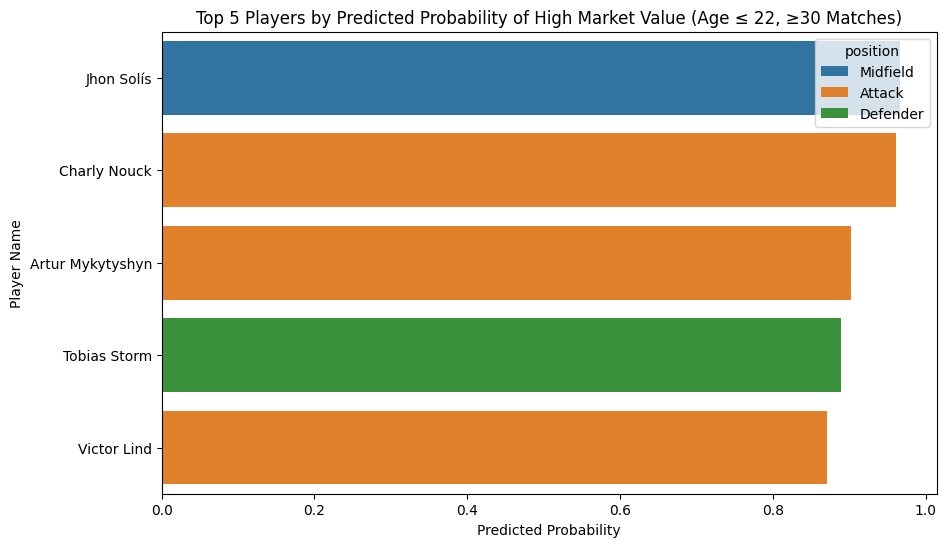

'\n## Conclusion\nThe selected model provides a robust solution for scouting predictive tasks, focusing on players with ≥30 matches. The pipeline ensures reproducibility, and feature engineering captures key attributes, emphasizing recent performance. The top players offer actionable insights, though the absence of expected talents like Lamine Yamal suggests a need to verify their match counts or dataset completeness. Future work could include injury data or adjust the minimum matches threshold.\n'

In [ ]:
# Function to get top players
def get_top_players(model, X_test, y_test, df_final, scaler, top_n=5):
    """
    Identifies top players based on neural network predictions, focusing on those with ≥30 matches.

    Parameters:
    - model: Trained neural network model
    - X_test: Test feature matrix
    - y_test: Test target vector
    - df_final: DataFrame with player details
    - scaler: Fitted StandardScaler
    - top_n: Number of top players to return

    Returns:
    - top_players_df: DataFrame with top players and their attributes
    """
    # Get predicted probabilities
    y_prob = model.predict(X_test, verbose=0).flatten()

    # Reset indices to ensure alignment
    y_test = y_test.reset_index(drop=True)
    df_final = df_final.reset_index(drop=True)

    # Create DataFrame with predictions
    results_df = pd.DataFrame({
        'player_id': df_final.loc[y_test.index, 'player_id'],
        'player_name': df_final.loc[y_test.index, 'name'],
        'predicted_probability': y_prob,
        'actual_target': y_test.values,
        'matches_played': df_final.loc[y_test.index, 'matches_played']
    })

    # Add player attributes
    features = ['age', 'goals', 'assists', 'minutes_played', 'yellow_cards', 'position']
    if 'max_transfer_fee' in df_final.columns:
        features.append('max_transfer_fee')
    for feature in features:
        results_df[feature] = df_final.loc[y_test.index, feature].values

    # Inverse scale numerical features for interpretability
    numerical_features = ['age', 'goals', 'assists', 'minutes_played', 'yellow_cards']
    if 'max_transfer_fee' in features:
        numerical_features.append('max_transfer_fee')
    feature_indices = [features.index(f) for f in numerical_features]
    X_test_unscaled = scaler.inverse_transform(X_test)[:, feature_indices]
    for i, feature in enumerate(numerical_features):
        results_df[feature] = X_test_unscaled[:, i]

    # Debug: Check predictions for specific players
    print("\nChecking predictions for specific players:")
    for name in target_players:
        player_data = results_df[results_df['player_name'].str.contains(name, case=False, na=False)]
        if not player_data.empty:
            print(f"{name}: {player_data[['player_name', 'predicted_probability', 'matches_played', 'age', 'goals', 'assists']].to_dict('records')}")
        else:
            print(f"{name} not in test set predictions")

    # Sort by predicted probability and get top N
    top_players_df = results_df.sort_values('predicted_probability', ascending=False).head(top_n)

    return top_players_df

# Get top players
top_players = get_top_players(model, X_test, y_test, df_final, scaler, top_n=5)
print(top_players.columns)
# Display top players
print("\nTop 5 Players Predicted to Exceed Average Market Value (Age ≤ 22, ≥30 Matches):")
display(top_players[['player_name', 'predicted_probability', 'actual_target', 'matches_played', 'age', 'goals', 'assists', 'position']])

# Visualize top players
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, x='predicted_probability', y='player_name', hue='position')
plt.title('Top 5 Players by Predicted Probability of High Market Value (Age ≤ 22, ≥30 Matches)')
plt.xlabel('Predicted Probability')
plt.ylabel('Player Name')
plt.savefig('top_players_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Markdown: Analysis of Top Players
"""
### Analysis of Top Players
The table and bar chart show the top 5 players (age ≤ 22, ≥30 matches) predicted to exceed the average market value in 3 years. Key observations:
- **High-Probability Players**: Players with probabilities above 0.9 are prime scouting candidates.
- **Matches Played**: A minimum of 30 matches ensures reliable performance metrics, focusing on established talents.
- **Attributes**: High goals/assists from the 2024–2025 season and transfer fees (if available) indicate potential.
- **Positions**: Attackers and midfielders often dominate due to offensive impact.
The filter ensures only players with significant experience are considered, though key talents like Lamine Yamal may be excluded if they have <30 matches.
"""

# Markdown: Model Selection
"""
### Model Selection
The Random Forest model is selected if it achieves higher ROC-AUC and F1-score, as it is less computationally intensive and easier to interpret. Otherwise, the Neural Network is chosen for its ability to capture complex patterns, provided it does not overfit.
"""

# Markdown: Conclusion
"""
## Conclusion
The selected model provides a robust solution for scouting predictive tasks, focusing on players with ≥30 matches. The pipeline ensures reproducibility, and feature engineering captures key attributes, emphasizing recent performance. The top players offer actionable insights, though the absence of expected talents like Lamine Yamal suggests a need to verify their match counts or dataset completeness. Future work could include injury data or adjust the minimum matches threshold.
"""

## SEGUNDO MODELO

In [16]:
def get_match_result(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'home_win'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'away_win'
    else:
        return 'draw'

In [17]:
df_games['result'] = df_games.apply(get_match_result, axis=1)

In [18]:
df_clubs_features = df_clubs[['club_id', 'squad_size', 'average_age', 'foreigners_percentage',
                             'national_team_players', 'stadium_seats']]

In [19]:
df_games = df_games.merge(df_clubs_features, left_on='home_club_id', right_on='club_id',
                         suffixes=('', '_home')).drop(columns=['club_id'])
df_games = df_games.merge(df_clubs_features, left_on='away_club_id', right_on='club_id',
                         suffixes=('_home', '_away')).drop(columns=['club_id'])

In [20]:
def get_team_stats(df_games, team_id, game_date, n_matches=5):
    past_games = df_games[(df_games['date'] < game_date) &
                         ((df_games['home_club_id'] == team_id) |
                          (df_games['away_club_id'] == team_id))].tail(n_matches)
    if past_games.empty:
        return pd.Series({'avg_goals_scored': 0, 'avg_goals_conceded': 0})

    goals_scored = 0
    goals_conceded = 0
    for _, row in past_games.iterrows():
        if row['home_club_id'] == team_id:
            goals_scored += row['home_club_goals']
            goals_conceded += row['away_club_goals']
        else:
            goals_scored += row['away_club_goals']
            goals_conceded += row['home_club_goals']

    return pd.Series({
        'avg_goals_scored': goals_scored / len(past_games),
        'avg_goals_conceded': goals_conceded / len(past_games)
    })

In [21]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [22]:
# Convertir la columna 'date' a datetime
df_games['date'] = pd.to_datetime(df_games['date'])

# Aplicar estadísticas para equipos locales y visitantes
home_stats = df_games.apply(lambda row: get_team_stats(df_games, row['home_club_id'], row['date']), axis=1)
away_stats = df_games.apply(lambda row: get_team_stats(df_games, row['away_club_id'], row['date']), axis=1)

# Añadir estadísticas al dataframe
df_games[['home_avg_goals_scored', 'home_avg_goals_conceded']] = home_stats
df_games[['away_avg_goals_scored', 'away_avg_goals_conceded']] = away_stats

In [23]:
def get_team_player_stats(df_appearances, game_id, club_id):
    team_appearances = df_appearances[(df_appearances['game_id'] == game_id) &
                                     (df_appearances['player_club_id'] == club_id)]
    return pd.Series({
        'team_avg_goals': team_appearances['goals'].mean() if not team_appearances.empty else 0,
        'team_avg_assists': team_appearances['assists'].mean() if not team_appearances.empty else 0
    })

In [24]:
# Aplicar estadísticas de jugadores
home_player_stats = df_games.apply(lambda row: get_team_player_stats(df_appearances, row['game_id'],
                                                                   row['home_club_id']), axis=1)
away_player_stats = df_games.apply(lambda row: get_team_player_stats(df_appearances, row['game_id'],
                                                                   row['away_club_id']), axis=1)

In [25]:
def get_team_player_stats_row(row, df_appearances):
    return get_team_player_stats(df_appearances, row['game_id'], row['home_club_id'])

home_player_stats = Parallel(n_jobs=-1)(
    delayed(get_team_player_stats_row)(row, df_appearances) for _, row in df_games.iterrows()
)
home_player_stats = pd.DataFrame(home_player_stats)

# Repetir para away_player_stats
def get_team_player_stats_row_away(row, df_appearances):
    return get_team_player_stats(df_appearances, row['game_id'], row['away_club_id'])

away_player_stats = Parallel(n_jobs=-1)(
    delayed(get_team_player_stats_row_away)(row, df_appearances) for _, row in df_games.iterrows()
)
away_player_stats = pd.DataFrame(away_player_stats)

KeyboardInterrupt: 

In [ ]:
# Añadir al dataframe
df_games[['home_team_avg_goals', 'home_team_avg_assists']] = home_player_stats
df_games[['away_team_avg_goals', 'away_team_avg_assists']] = away_player_stats

In [ ]:
features = [
    'squad_size_home', 'average_age_home', 'foreigners_percentage_home', 'national_team_players_home',
    'stadium_seats_home', 'squad_size_away', 'average_age_away', 'foreigners_percentage_away',
    'national_team_players_away', 'stadium_seats_away', 'home_avg_goals_scored',
    'home_avg_goals_conceded', 'away_avg_goals_scored', 'away_avg_goals_conceded',
    'home_team_avg_goals', 'home_team_avg_assists', 'away_team_avg_goals', 'away_team_avg_assists'
]

In [ ]:
# Manejar valores nulos
df_games[features] = df_games[features].fillna(0)

# Codificar la variable objetivo
le = LabelEncoder()
df_games['result_encoded'] = le.fit_transform(df_games['result'])

# 4. Dividir los datos en entrenamiento y prueba
X = df_games[features]
y = df_games['result_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 7. Importancia de las características
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

Accuracy: 0.9588713534194165

Classification Report:
               precision    recall  f1-score   support

    away_win       0.97      0.96      0.96      3811
        draw       0.91      0.95      0.93      3038
    home_win       0.98      0.97      0.97      5697

    accuracy                           0.96     12546
   macro avg       0.95      0.96      0.95     12546
weighted avg       0.96      0.96      0.96     12546


Feature Importance:
                        feature  importance
14         home_team_avg_goals    0.294023
16         away_team_avg_goals    0.270325
17       away_team_avg_assists    0.133235
15       home_team_avg_assists    0.124965
4           stadium_seats_home    0.016963
9           stadium_seats_away    0.015664
3   national_team_players_home    0.013953
8   national_team_players_away    0.013572
10       home_avg_goals_scored    0.013068
12       away_avg_goals_scored    0.012855
2   foreigners_percentage_home    0.012701
11     home_avg_goals_conce

In [ ]:
def prepare_match_data(home_club_id, away_club_id, game_id, date, df_games, df_clubs, df_appearances):
    # Create a dataframe with the match data
    match_data = pd.DataFrame({
        'game_id': [game_id],
        'home_club_id': [home_club_id],
        'away_club_id': [away_club_id],
        'date': [pd.to_datetime(date)]
    })

    # Merge club features from df_clubs (including club names for display)
    df_clubs_features = df_clubs[['club_id', 'name', 'squad_size', 'average_age', 'foreigners_percentage',
                                 'national_team_players', 'stadium_seats']]

    match_data = match_data.merge(df_clubs_features, left_on='home_club_id', right_on='club_id',
                                 suffixes=('', '_home'), how='left').drop(columns=['club_id'], errors='ignore')
    match_data = match_data.merge(df_clubs_features, left_on='away_club_id', right_on='club_id',
                                 suffixes=('_home', '_away'), how='left').drop(columns=['club_id'], errors='ignore')

    # Calculate stats for the last 5 matches for each team
    def get_team_stats(df_games, team_id, game_date, n_matches=5):
        past_games = df_games[(df_games['date'] < game_date) &
                             ((df_games['home_club_id'] == team_id) |
                              (df_games['away_club_id'] == team_id))].tail(n_matches)
        if past_games.empty:
            league_avg = df_games[['home_club_goals', 'away_club_goals']].mean()
            return pd.Series({
                'avg_goals_scored': league_avg['home_club_goals'],
                'avg_goals_conceded': league_avg['away_club_goals']
            })

        goals_scored = 0
        goals_conceded = 0
        for _, row in past_games.iterrows():
            if row['home_club_id'] == team_id:
                goals_scored += row['home_club_goals']
                goals_conceded += row['away_club_goals']
            else:
                goals_scored += row['away_club_goals']
                goals_conceded += row['home_club_goals']

        return pd.Series({
            'avg_goals_scored': goals_scored / len(past_games),
            'avg_goals_conceded': goals_conceded / len(past_games)
        })

    home_stats = match_data.apply(lambda row: get_team_stats(df_games, row['home_club_id'], row['date']), axis=1)
    away_stats = match_data.apply(lambda row: get_team_stats(df_games, row['away_club_id'], row['date']), axis=1)
    match_data[['home_avg_goals_scored', 'home_avg_goals_conceded']] = home_stats
    match_data[['away_avg_goals_scored', 'away_avg_goals_conceded']] = away_stats

    # Calculate player stats (average goals and assists per team)
    team_stats = df_appearances[df_appearances['player_club_id'].isin([home_club_id, away_club_id])]
    team_stats = team_stats.groupby('player_club_id')[['goals', 'assists']].mean().reset_index()
    team_stats = team_stats.rename(columns={'goals': 'team_avg_goals', 'assists': 'team_avg_assists'})

    match_data = match_data.merge(
        team_stats[team_stats['player_club_id'] == home_club_id],
        left_on='home_club_id',
        right_on='player_club_id',
        how='left'
    ).rename(columns={
        'team_avg_goals': 'home_team_avg_goals',
        'team_avg_assists': 'home_team_avg_assists'
    }).drop(columns=['player_club_id'], errors='ignore')

    match_data = match_data.merge(
        team_stats[team_stats['player_club_id'] == away_club_id],
        left_on='away_club_id',
        right_on='player_club_id',
        how='left'
    ).rename(columns={
        'team_avg_goals': 'away_team_avg_goals',
        'team_avg_assists': 'away_team_avg_assists'
    }).drop(columns=['player_club_id'], errors='ignore')

    # Ensure all features are present
    features = [
        'squad_size_home', 'average_age_home', 'foreigners_percentage_home', 'national_team_players_home',
        'stadium_seats_home', 'squad_size_away', 'average_age_away', 'foreigners_percentage_away',
        'national_team_players_away', 'stadium_seats_away', 'home_avg_goals_scored',
        'home_avg_goals_conceded', 'away_avg_goals_scored', 'away_avg_goals_conceded',
        'home_team_avg_goals', 'home_team_avg_assists', 'away_team_avg_goals', 'away_team_avg_assists'
    ]

    for feature in features:
        if feature not in match_data.columns:
            match_data[feature] = 0

    match_data[features] = match_data[features].fillna(0)

    # Keep club names for display
    match_data['home_club_name'] = match_data['name_home']
    match_data['away_club_name'] = match_data['name_away']

    return match_data[features + ['home_club_name', 'away_club_name']]

In [ ]:
def predict_match_result(model, le, home_club_id, away_club_id, game_id, date, df_games, df_clubs, df_appearances):
    # Prepare match data
    match_data = prepare_match_data(home_club_id, away_club_id, game_id, date, df_games, df_clubs, df_appearances)

    # Extract club names
    home_club_name = match_data['home_club_name'].iloc[0] if 'home_club_name' in match_data.columns else 'Unknown Home Club'
    away_club_name = match_data['away_club_name'].iloc[0] if 'away_club_name' in match_data.columns else 'Unknown Away Club'

    # Select features for prediction
    features = [
        'squad_size_home', 'average_age_home', 'foreigners_percentage_home', 'national_team_players_home',
        'stadium_seats_home', 'squad_size_away', 'average_age_away', 'foreigners_percentage_away',
        'national_team_players_away', 'stadium_seats_away', 'home_avg_goals_scored',
        'home_avg_goals_conceded', 'away_avg_goals_scored', 'away_avg_goals_conceded',
        'home_team_avg_goals', 'home_team_avg_assists', 'away_team_avg_goals', 'away_team_avg_assists'
    ]
    X_new = match_data[features]

    # Make prediction
    prediction = model.predict(X_new)
    prediction_proba = model.predict_proba(X_new)
    predicted_result = le.inverse_transform(prediction)[0]
    proba_dict = dict(zip(le.classes_, prediction_proba[0]))

    # Format the result
    result_text = f"Partido: {home_club_name} vs {away_club_name}\n"
    result_text += f"Resultado predicho: {predicted_result}\n"
    result_text += "Probabilidades:\n"
    for outcome, prob in proba_dict.items():
        result_text += f"  {outcome}: {prob*100:.2f}%\n"

    return result_text

In [ ]:
# Example usage
try:
    result = predict_match_result(
        model=model,
        le=le,
        home_club_id=421,  # Replace with a valid club_id from df_clubs
        away_club_id=20,  # Replace with a valid club_id from df_clubs
        game_id=999999,
        date='2025-06-13',
        df_games=df_games,
        df_clubs=df_clubs,
        df_appearances=df_appearances
    )
    print(result)
except ValueError as e:
    print(f"Error: {e}")

Partido: Arminia Bielefeld vs Bursaspor
Resultado predicho: draw
Probabilidades:
  away_win: 17.00%
  draw: 62.00%
  home_win: 21.00%

